In [12]:
import h5py
import numpy as np
import os
from datetime import datetime
import dascore as dc
import pandas as pd
import random
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go

catalog_path_A = 'GES16Aand16BStimulationMonitoringApril2024/16AStimulationCatalogues'
catalog_path_B = 'GES16Aand16BStimulationMonitoringApril2024/16BStimulationCatalogues'

output_folder = 'data_statistics'
show_images = False
width_mm = 85
dpi = 300
width_in = width_mm / 25.4
height_in = width_in * 0.75

dataframes = []
for file_name in os.listdir(catalog_path_A):
    file_path = os.path.join(catalog_path_A, file_name)
    if file_name.endswith('.csv') and file_name.startswith('FORGE'):
        df = pd.read_csv(file_path)
        if not df.empty:
            dataframes.append(df)

for file_name in os.listdir(catalog_path_B):
    file_path = os.path.join(catalog_path_B, file_name)
    if file_name.endswith('.csv') and file_name.startswith('FORGE'):
        df = pd.read_csv(file_path)
        if not df.empty:
            dataframes.append(df)

catalog_df = pd.concat(dataframes, ignore_index=True)
catalog_df.columns = catalog_df.columns.str.strip().str.replace(' ', '_')
catalog_df = catalog_df[catalog_df['Depth'] > 0]

catalog_df

Source    Trig_Date         Trig_Time  Origin_Date       Origin_Time  \
0      147.0     7/4/2024   14:15:33.639500     7/4/2024   14:15:33.476563   
1      164.0     7/4/2024   14:16:12.332750     7/4/2024   14:16:12.374339   
2      187.0     7/4/2024   14:16:55.954500     7/4/2024   14:16:55.974545   
3      257.0     7/4/2024   14:19:30.439250     7/4/2024   14:19:30.597845   
4      429.0     7/4/2024   14:25:47.111250     7/4/2024   14:25:46.986282   
...      ...          ...               ...          ...               ...   
2977   163.0    17/4/2024   16:26:41.243750    17/4/2024   16:26:40.864426   
2978   150.0    20/4/2024   05:58:38.199000    20/4/2024   05:58:38.055386   
2979   982.0    21/4/2024   19:47:57.249250    21/4/2024   19:47:57.057041   
2980  1360.0    22/4/2024   20:03:02.198250    22/4/2024   20:03:02.002227   
2981  1612.0    23/4/2024   15:25:40.019000    23/4/2024   15:25:39.831104   

            Profile  Status  Cluster       Y       X  ...  MomMag     PGV  \
0           Primary     2.0      0.0 -2250.0  2270.0  ...   -0.37   36.12   
1           Primary     2.0      0.0 -2260.0  2280.0  ...    0.09   55.53   
2           Primary     2.0      0.0  -390.0  2100.0  ...    0.65  477.11   
3           Primary     2.0      0.0  -350.0  2110.0  ...    0.46  247.66   
4           Primary     2.0      0.0 -2290.0  2310.0  ...    0.10  165.47   
...             ...     ...      ...     ...     ...  ...     ...     ...   
2977        Primary     2.0      0.0 -3050.0 -3540.0  ...   -0.64    3.24   
2978        Primary     2.0      0.0   -50.0  2320.0  ...   -0.65   38.40   
2979        Primary     2.0      0.0 -5000.0  2340.0  ...   -0.22   12.15   
2980        Primary     2.0      0.0 -5060.0  2360.0  ...   -0.15   14.20   
2981        Primary     4.0      0.0  -110.0  3430.0  ...   -1.08   20.21   

          Stage  P_S/N  S_S/N  Quality      Error      Location rms_Noise  \
0     Post Stim   28.5   45.8      1.8  1000000.0       L2 msmx      8.24   
1     Post Stim   27.4   46.0      2.0  1000000.0       L2 msmx      7.87   
2     Post Stim   58.4  148.0      5.0  1000000.0       L2 msmx      7.84   
3     Post Stim   27.1   52.6      3.6  1000000.0       L2 msmx      7.83   
4     Post Stim   41.0   97.0      2.4  1000000.0       L2 msmx      8.01   
...         ...    ...    ...      ...        ...           ...       ...   
2977          4    9.7   12.6      1.2  1000000.0       L2 msmx     29.61   
2978          5    5.5    8.8      1.5  1000000.0       L2 msmx     33.94   
2979          5  361.5   18.6      1.2  1000000.0       L2 msmx     32.86   
2980          5  356.1   10.2      1.1  1000000.0       L2 msmx     27.71   
2981          5   22.5   46.5      2.1  1000000.0      L2 Check     47.88   

                                        Matched_File  
0       16B_StrainRate_20240407T201528+0000_38443.h5  
1       16B_StrainRate_20240407T201604+0000_38446.h5  
2       16B_StrainRate_20240407T201652+0000_38450.h5  
3       16B_StrainRate_20240407T201928+0000_38463.h5  
4       16B_StrainRate_20240407T202540+0000_38494.h5  
...                                              ...  
2977   16B_StrainRate_20240417T222640+0000_111099.h5  
2978   16B_StrainRate_20240420T115828+0000_129558.h5  
2979   16B_1_StrainRate_20240422T014756+0000_1241.h5  
2980   16B_1_StrainRate_20240423T020256+0000_8516.h5  
2981  16B_1_StrainRate_20240423T212532+0000_14329.h5  

[2920 rows x 21 columns]

In [17]:
selected_events = catalog_df[catalog_df['Matched_File'].notna()]
selected_events = selected_events.sort_values(by='MomMag', ascending=False).head(10)#.sort_values(by='rms_Noise', ascending=True).head(10)

selected_events

Source    Trig_Date         Trig_Time  Origin_Date       Origin_Time  \
386   7847.0     7/4/2024   01:21:19.734250     7/4/2024   01:21:19.527279   
439   2723.0     7/4/2024   09:55:59.241750     7/4/2024   09:55:59.399738   
2685   514.0     6/4/2024   18:18:03.582000     6/4/2024   18:18:03.388462   
443   3678.0     7/4/2024   10:29:06.890500     7/4/2024   10:29:06.696715   
367   6220.0     7/4/2024   00:26:54.294250     7/4/2024   00:26:54.070648   
155   6832.0     7/4/2024   06:31:43.841750     7/4/2024   06:31:43.718079   
162   8500.0     7/4/2024   07:28:32.655750     7/4/2024   07:28:32.530075   
418    768.0     7/4/2024   08:46:28.282000     7/4/2024   08:46:28.094324   
295   1748.0     6/4/2024   21:46:19.501500     6/4/2024   21:46:19.281500   
391   8164.0     7/4/2024   01:31:43.198000     7/4/2024   01:31:43.465088   

            Profile  Status  Cluster       Y       X  ...  MomMag     PGV  \
386         Primary     2.0      0.0 -2170.0  2150.0  ...    1.42  187.75   
439         Primary     2.0      0.0 -1750.0  2320.0  ...    1.31  370.24   
2685        Primary     2.0      0.0 -2000.0  2090.0  ...    1.29  187.75   
443         Primary     2.0      0.0 -2240.0  2190.0  ...    0.98  190.28   
367         Primary     2.0      0.0 -2210.0  2230.0  ...    0.95  187.75   
155         Primary     2.0      0.0  -160.0  2420.0  ...    0.87  187.75   
162         Primary     2.0      0.0  -180.0  2420.0  ...    0.79  187.75   
418         Primary     2.0      0.0 -2260.0  2180.0  ...    0.77  187.75   
295         Primary     2.0      0.0 -2200.0  2240.0  ...    0.76  187.75   
391         Primary     2.0      0.0 -2310.0  2310.0  ...    0.74  187.75   

      Stage P_S/N  S_S/N  Quality      Error      Location rms_Noise  \
386      10  31.5   56.2      4.2  1000000.0       L2 msmx     57.00   
439      25  18.5   43.7      4.6  1000000.0       L2 msmx     21.15   
2685      9  31.6   48.3      2.0  1000000.0       L2 msmx     48.80   
443      25  34.6   60.8      3.6  1000000.0       L2 msmx     21.86   
367      10  22.2   25.5      2.9  1000000.0       L2 msmx     16.59   
155      10  22.3   46.9      3.7  1000000.0       L2 msmx     11.83   
162      10  68.4   70.4      3.1  1000000.0       L2 msmx     13.98   
418      25  14.5   15.9      2.4  1000000.0       L2 msmx     13.83   
295      10  18.9   23.4      3.4  1000000.0       L2 msmx     14.92   
391      10  52.9   98.7      3.3  1000000.0       L2 msmx      8.34   

                                      Matched_File  
386   16B_StrainRate_20240407T072116+0000_34572.h5  
439   16B_StrainRate_20240407T155552+0000_37145.h5  
2685  16B_StrainRate_20240407T001752+0000_32455.h5  
443   16B_StrainRate_20240407T162904+0000_37311.h5  
367   16B_StrainRate_20240407T062652+0000_34300.h5  
155   16B_StrainRate_20240407T123140+0000_36124.h5  
162   16B_StrainRate_20240407T132828+0000_36408.h5  
418   16B_StrainRate_20240407T144628+0000_36798.h5  
295   16B_StrainRate_20240407T034616+0000_33497.h5  
391   16B_StrainRate_20240407T073140+0000_34624.h5  

[10 rows x 21 columns]

In [22]:
forge_path = '/bedrettolab/E1B/DAS/2024_FORGE/DATA_RAW_fromOpenei/April_2024/v1.0.0'
file_name = selected_events['Matched_File'].values[0]
file_path = os.path.join(forge_path, file_name)

patch = dc.spool(file_path)[0].transpose()

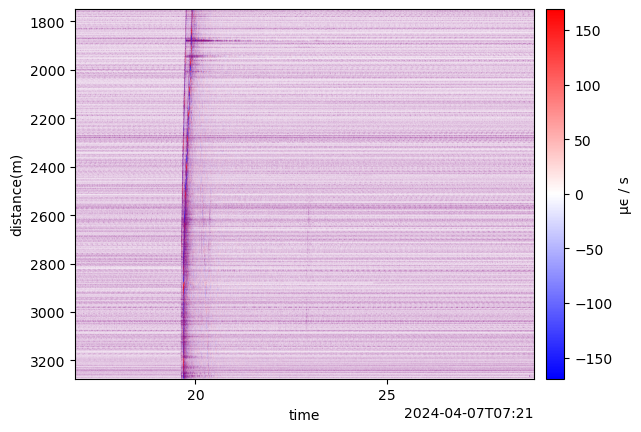

<Axes: xlabel='time', ylabel='distance(m)'>

In [23]:
patch.viz.waterfall(show=True, scale=0.05);

File: 16B_StrainRate_20240407T072116+0000_34572.h5
Time:  01:21:19.734250
Date:    7/4/2024
Magnitude: 1.42
Error: 1000000.0
rms: 57.0


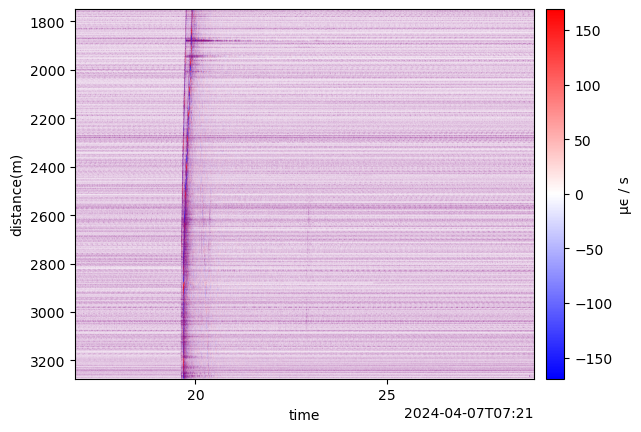

File: 16B_StrainRate_20240407T155552+0000_37145.h5
Time:  09:55:59.241750
Date:    7/4/2024
Magnitude: 1.31
Error: 1000000.0
rms: 21.15


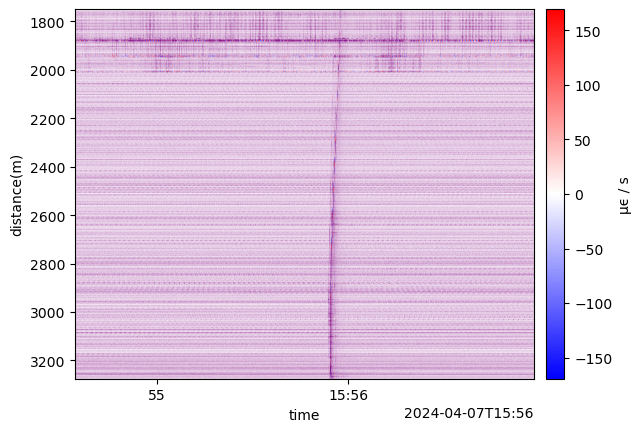

File: 16B_StrainRate_20240407T001752+0000_32455.h5
Time:  18:18:03.582000
Date:    6/4/2024
Magnitude: 1.29
Error: 1000000.0
rms: 48.8


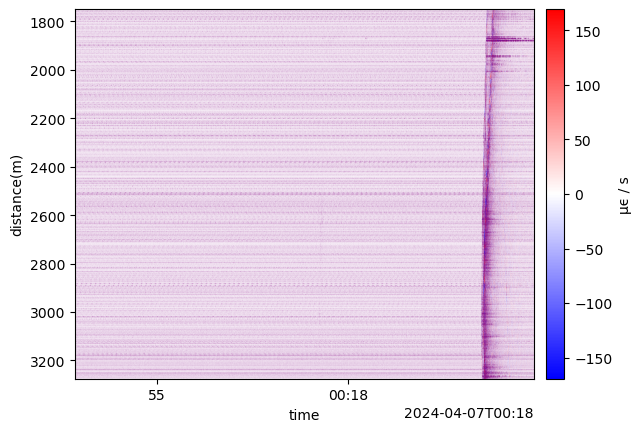

File: 16B_StrainRate_20240407T162904+0000_37311.h5
Time:  10:29:06.890500
Date:    7/4/2024
Magnitude: 0.98
Error: 1000000.0
rms: 21.86


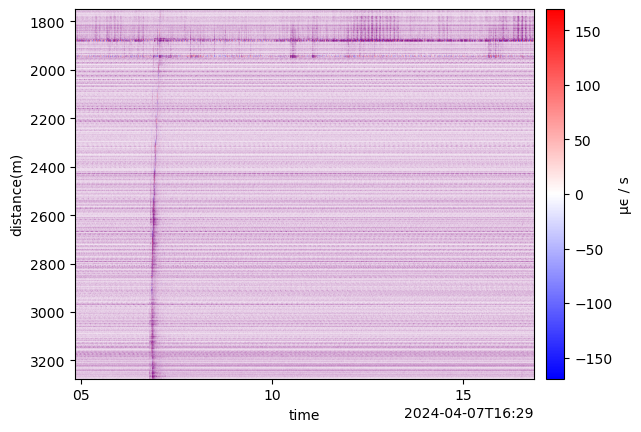

File: 16B_StrainRate_20240407T062652+0000_34300.h5
Time:  00:26:54.294250
Date:    7/4/2024
Magnitude: 0.95
Error: 1000000.0
rms: 16.59


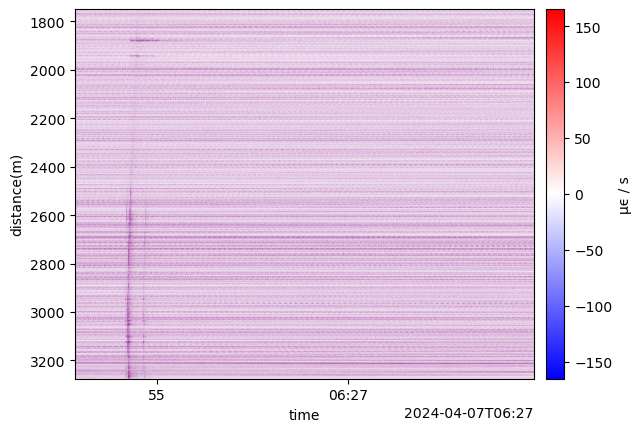

File: 16B_StrainRate_20240407T123140+0000_36124.h5
Time:  06:31:43.841750
Date:    7/4/2024
Magnitude: 0.87
Error: 1000000.0
rms: 11.83


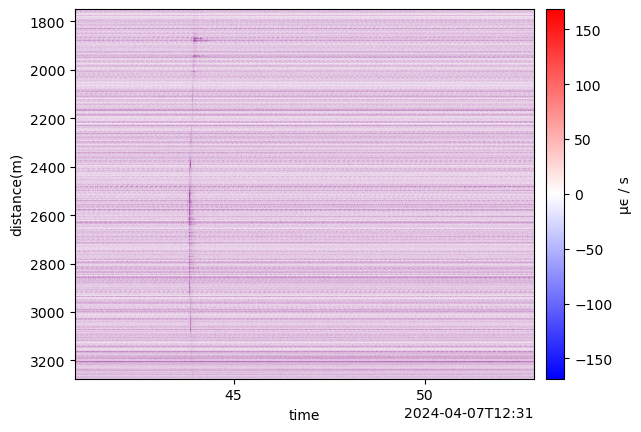

File: 16B_StrainRate_20240407T132828+0000_36408.h5
Time:  07:28:32.655750
Date:    7/4/2024
Magnitude: 0.79
Error: 1000000.0
rms: 13.98


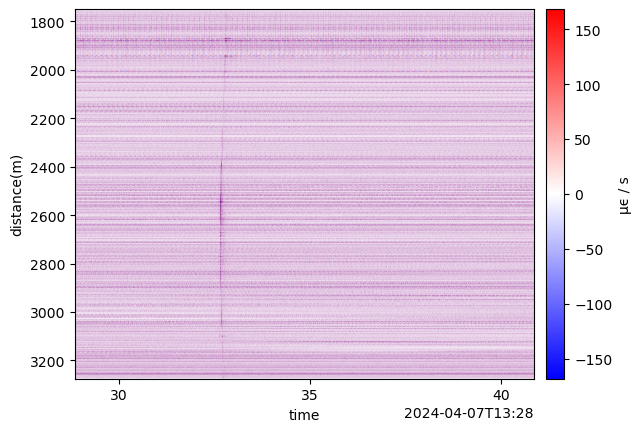

File: 16B_StrainRate_20240407T144628+0000_36798.h5
Time:  08:46:28.282000
Date:    7/4/2024
Magnitude: 0.77
Error: 1000000.0
rms: 13.83


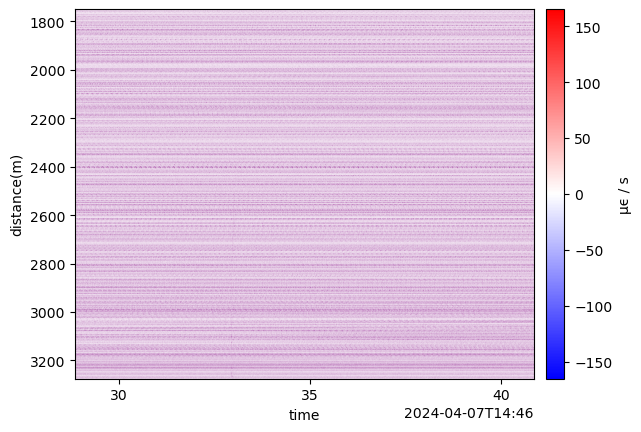

File: 16B_StrainRate_20240407T034616+0000_33497.h5
Time:  21:46:19.501500
Date:    6/4/2024
Magnitude: 0.76
Error: 1000000.0
rms: 14.92


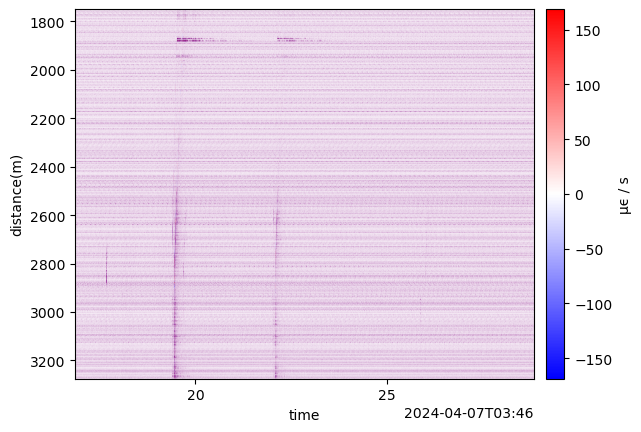

File: 16B_StrainRate_20240407T073140+0000_34624.h5
Time:  01:31:43.198000
Date:    7/4/2024
Magnitude: 0.74
Error: 1000000.0
rms: 8.34


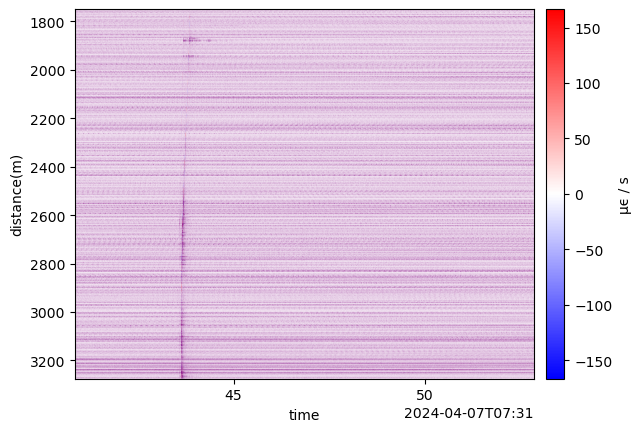

In [25]:
forge_path = '/bedrettolab/E1B/DAS/2024_FORGE/DATA_RAW_fromOpenei/April_2024/v1.0.0'

for index, row in selected_events.iterrows():
    event = row
    time, date = event['Trig_Time'], event['Trig_Date']
    magnitude = event['MomMag']
    error = event['Error']
    rms = event['rms_Noise']
    file_name = event['Matched_File']

    print(f'File: {file_name}\nTime: {time}\nDate: {date}\nMagnitude: {magnitude}\nError: {error}\nrms: {rms}')
    
    file_path = os.path.join(forge_path, file_name)
    try:
        patch = dc.spool(file_path)[0].transpose()
        patch.viz.waterfall(show=True, scale=0.05);
    except Exception as e:
        print(f"Error loading {file_name}: {e}")
    

Experiments

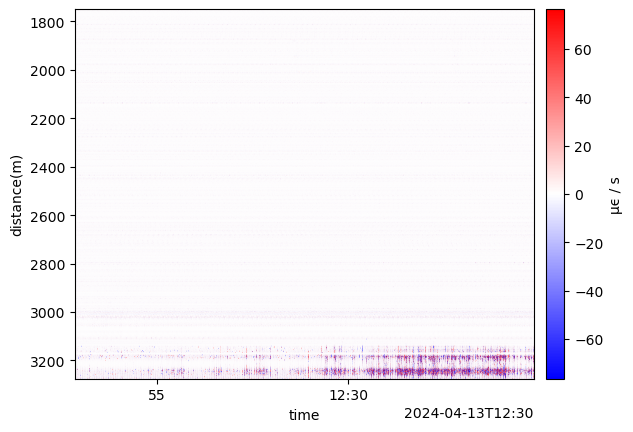

In [ ]:
# patch.viz.wiggle(show=True)
dt = patch.get_coord('time').step
smoothed = patch.rolling(time=50*dt).mean() # average mean
smoothed.viz.waterfall(scale=.1);

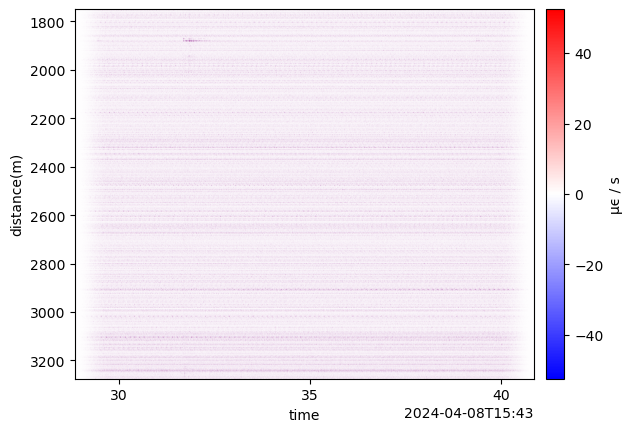

In [9]:
patch_filtered = (
    patch.taper(time=0.075)
    .pass_filter(time=(None, 1000))
)

patch_filtered.viz.waterfall(show=True, scale=0.2);

In [1]:
fk_patch = patch_filtered.dft(patch.dims)

# We can't plot complex arrays so only plot amplitude
ax = fk_patch.abs().viz.waterfall()

NameError: name 'patch_filtered' is not defined